In [3]:
%config Completer.use_jedi = False

# 지도학습 

- iris_dataset 분류모델 
    - 학습시킬 dataset의 format은 정해져있다. 
    - 배치사이즈 , 데이터 feature 순으로 되어있다.   
    (150,4) 150:배치사이즈 , 4:속성의 개수   
      이미지 데이터라면 (100,64,64,3) -100개의 배치사이즈 , 64x64x3의 이미지 데이터   
    - target,label 데이터는 (배치사이즈,) 형태로 1차원 배열.   원핫 인코딩이 되어있다면 배치사이즈x클래스개수 

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris() # python의 dict 클래스와 유사한 Bunch 클래스의 객체

In [5]:
iris_dataset["data"].shape

(150, 4)

In [1]:
from sklearn.model_selection import train_test_split
# train_test_split : 배치사이즈의 크기를 나누는 

```python
train_test_split(X_array,Y_array,test_size=0.25,)
```

In [6]:
x_train,x_test=train_test_split(iris_dataset["data"],test_size=0.5)

In [7]:
x_train.shape

(75, 4)

In [8]:
x_test.shape

(75, 4)

In [13]:
y_train,y_test=train_test_split(iris_dataset["target"],test_size=0.5,shuffle=True)

In [14]:
y_train

array([2, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1,
       1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 1,
       0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 1,
       0, 1, 0, 1, 2, 1, 0, 0, 0])

# 데이터 시각화를 해서 대충 데이터의 정보를 파악 !

# K-Nearlist Neighbor 알고리즘 (분류)

- 어떠한 분류가 되어있는 데이터셋을 학습시켜놓았다. 
    - 새로운 데이터가 어디 그룹에 속해있는지 알기위해서 가장 간단한 방법은 분류되어있는 그룹들과 가장 친한(가까운)놈을 찾으면 되징 !  

In [15]:
from sklearn.neighbors import KNeighborsClassifier

```python
KNeighborsClassifier(parameter설정)
``` 
> ㅁㅇㄴㄹ  :   
ㅁㅇㄴㄹㄴㅇㄹ:

    """
    메소드
    """
----------------------------------------



In [ ]:
knn_model = KNeighborsClassifier() # 우리가 사용할 KNN모델 파라메터 설정 
knn_model.fit(x_train,y_train) # knn_model에 학습이 된다 

In [ ]:
knn_model.predict

# 지도학습의 종류 - 분류와 회기 
과대적합 -> train_set에 너무 세세하게 적합되어버려서 train_set에만 맞는 모델이 되어버림
과소적합 -> 규칙이 너무 일반적(광범위)라서 맞는 말이지만 안맞음. 
해결방법 데이터의 양을 늘려서 일반화를 해야한다 ! 

# 2. 선형모델 

- 모델 파라미터
- 하이퍼 파라미터 

$$ 
Y = WX + b
$$

- 선형회기
    - 일반적인 wx+b , 최소 제곱법(OLS, Ordinary Least Squares)
- 릿지 
    - w가 0에 가까울 정도로 작은 wx+b (w != 0 이다)
- 라쏘 
    - w가 0에 가까울 정도로 작으며 실제로 w = 0 이 가능

# 3. 선형 이진 분류  

로지스틱 회귀 (logistic Regression) - linear_model.LogisticRegression에 구현 되어 있음 - 이진 분류에서 logistic 손실 함수 사용, 다중 분류에서 교차 엔트로피( cross-entropy ) 손실 함수 사용
서포트 벡터 머신 ( Support Vector Machine - SVM ) - 제곱 힌지 ( squared hinge ) 손실 함수 사용

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

```python
sklearn.model_selection.train_test_split()
```
> stratify : y_target 분류 class의 비율을 train과 test똑같이 맞춰줌 만약 원본데이터의 비율이 75:25이면 train,test 데이터 set안에도 똑같은 비율

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))


훈련 세트 점수 : 0.946
테스트 세트 점수 : 0.958


/home/godeung/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [15]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수 : 0.946
테스트 세트 점수 : 0.965


/home/godeung/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



    위의 그림을 잘 살펴 보면 C 매개변수가 특성에 미치는 영향을 파악 할 수 있는데, 릿지 회귀와 비슷한 모양세를 보이고 있습니다.

    규제를 강하게 할 수록( C 값이 감소 할 수록 ) 계수들을 0에 가깝게 만들지만 완전한 0으로 만들지는 않는 것이 보이고 있습니다.

    그리고 세 번째 계수인 mean perimeter를 보면 C=100, C = 1 일때는 음수지만 C=0.0001 이면 양수가 되며, C = 1일 때보다 절댓값이 더 큰 것을 확인 할 수 있습니다.

    이와같이 모델을 해석하면 계수가 클래스와 특성의 연관성을 알려줄 수도 있습니다.

    다른 예로 texture error 특성은 악성인 샘플과 영향이 깊다는 것도 알 수 있습니다. ( 음수 ) 하지만 mean perimeter는 계수의 부호가 바뀜에 따라서 양성이나 악성의 신호 모두가 될 수 있다고도 판단 할 수 있습니다.

    다음은 L1 규제를 사용한 LogisticRegression 입니다

# 4. 다중 선형 분류

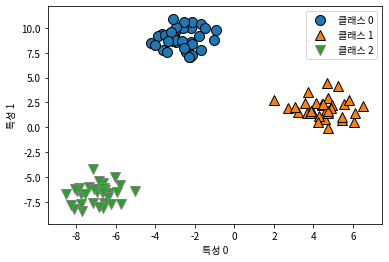

In [38]:
import matplotlib as mpl
from matplotlib import font_manager, rc
path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import make_blobs

X, Y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [27]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, Y)
print("계수 배열의 크기 : ", linear_svm.coef_.shape)
df_coef = pd.DataFrame(columns=["특성 0","특성 1"] ,data=linear_svm.coef_)
df_coef

계수 배열의 크기 :  (3, 2)


,특성 0,특성 1
0,-0.174927,0.231407
1,0.476215,-0.069371
2,-0.189141,-0.204006


In [28]:
print("절편 배열의 크기 : ", linear_svm.intercept_.shape)
df_intercept = pd.DataFrame(columns=["절편"], data = linear_svm.intercept_)
df_intercept

절편 배열의 크기 :  (3,)


,절편
0,-1.077454
1,0.131406
2,-0.086050


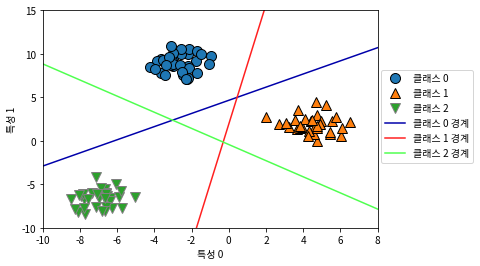

In [30]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
line = np.linspace(-15, 15) # -15 ~ 15 까지 50개의 수열을 생성

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color) # 판별 함수 사용

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계','클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

# 5. 결정트리 

- 스무고개 놀이와 비슷하다. 

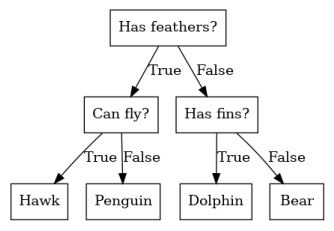

In [33]:
mglearn.plots.plot_animal_tree()

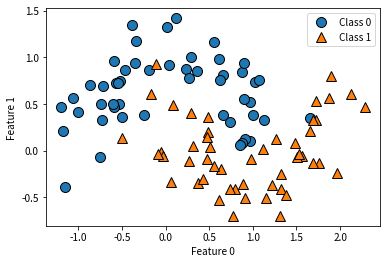

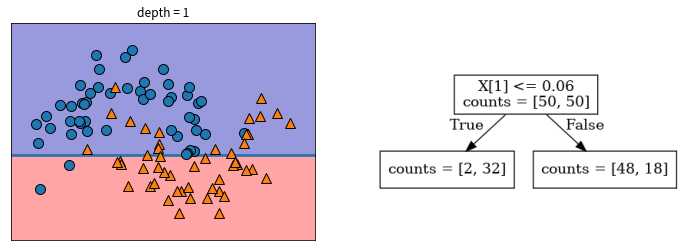

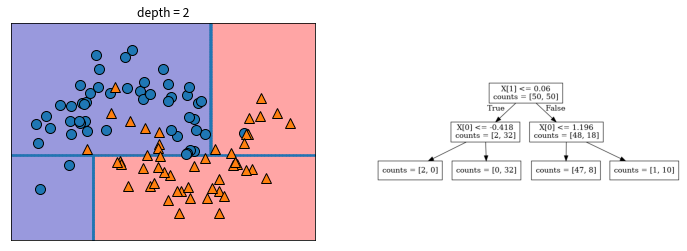

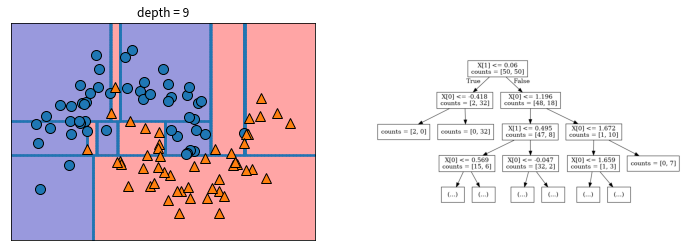

In [34]:
mglearn.plots.plot_tree_progressive()

Text(0, 0.5, '가격 ($/Mbyte)')

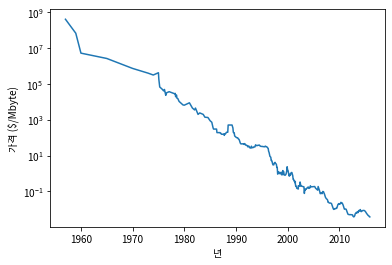

In [35]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

# 6. 앙상블 모델 (결정트리를 다중으로 사용 ! )

### 랜덤 포레스트
- 결정 트리의 가장 큰 단점 -> 과대적합 될 경향이 있다.    
  서로 다른 방향으로 과대적합된 트리 많이 만들어서 편균값을 쓰자 
    - 트리를 생성 할 때 사용하는 데이터 포인트(특성)을 무작위로 선택
    - 분할 테스트에서 특성을 무작위로 선택하는 방법
```python
andomForestClassifier나 RandomForestRegressor 클래스의 
n_estimators 매개변수

```
    


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

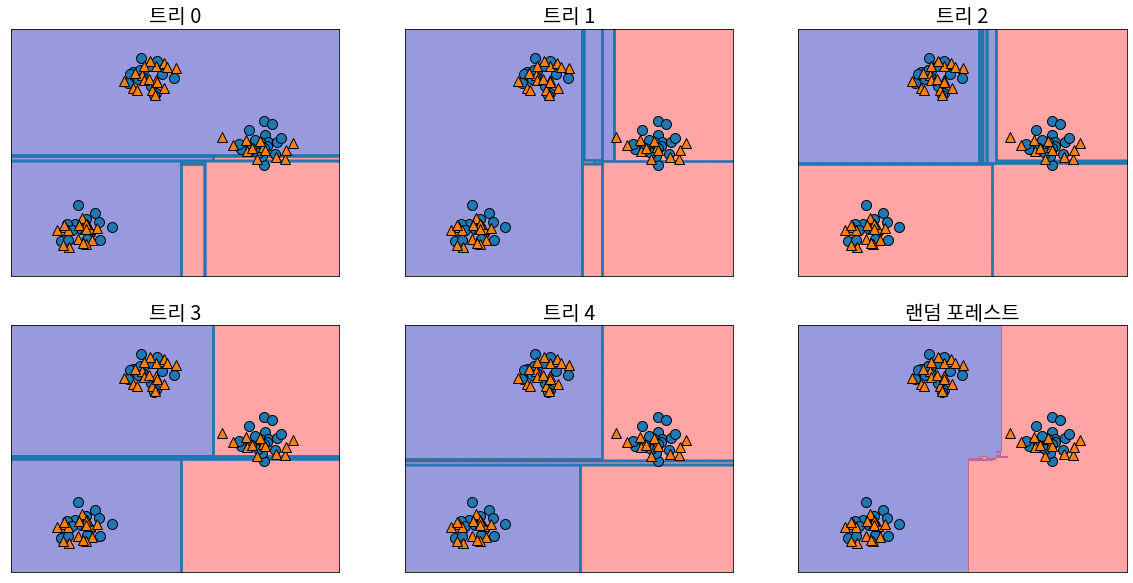

In [51]:

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i),fontsize = 20)
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트",fontsize = 20)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [52]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


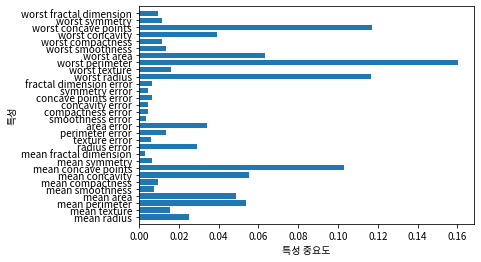

In [53]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(forest)

### 그래디언트 부스팅 회기 트리 

랜덤 포레스트와의 차이점은 그래디언트 부스팅 회귀 트리에는 ***무작위성이 없다는 점***입니다. 그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만들어 냅니다. 무작위성을 포기하는 대신에 ***강력한 사전 가지치기***를 사용합니다.

- 그래디언트 부스팅 회기 트리는 랜덤 포래스트와 비슷하게 여러개의 결정트리 사용 

***차이점은 ?***
1. 무작위성이 없다.
2. 무작위성을 포기하는 대신에 강력한 사전 가지치기를 사용 

    




# 7. 서포트 벡터 머신

linearSVC 사용 해보앗음 
SVM은 선형모델과는 다르게 단순히 선이나 평면으로 분류를 하지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것 